___
# Projeto 2 - Insper 
### Ciência dos Dados:
___

Nome: Antonio Vieira Fuziy

Nome: Ramon Menegatto Gonzalez

___
- **O produto escolhido pela dupla foi o banco Nubank. A proposta da escolha foi identificar como comentários relevantes, tweets que apontassem alguma deficiência, melhoria ou benefício do serviço do Nubank. Dessa forma seria possível identificar os pontos positivos e negativos em relação a empresa, esses comentários poderiam ser utilizados para corrigir os problemas da empresa e aumentar a sua aprovação entre seus clientes cada vez mais. Além disso, os comentários considerados irrelevantes foram os que não acrescentavam nada ao Nubank.**

___
### Importando Bibliotecas

In [1044]:
import tweepy
import math
import os.path
import pandas as pd
import json
from random import shuffle
import matplotlib.pyplot as plt
import re
import emoji
import emoji_list

plt.style.use('ggplot')

In [1045]:
#Dados de autenticação do twitter:

#Coloque aqui o identificador da conta no twitter: @fulano

#leitura do arquivo no formato JSON
with open('auth.pass') as fp:
    data = json.load(fp)

#Configurando a biblioteca. Não modificar
auth = tweepy.OAuthHandler(data['consumer_key'], data['consumer_secret'])
auth.set_access_token(data['access_token'], data['access_token_secret'])

___
# Montando o Classificador Naive-Bayes

- **Considerando apenas as mensagens da planilha Treinamento, utilizou-se as células abaixo para ensinar o classificador, por meio dos cálculos das probabilidades de cada palavra. Dessa forma, essas probabilidades seriam utilizadas para classificar o excel (Teste).**

___
#### Utilizando Excel de Treinamento já classificado.

In [1049]:
df = pd.read_excel('Nubank.xlsx')

In [1050]:
relevancia = df.iloc[0:,0]
tweets = df.iloc[0:,1]

In [1051]:
df.head()

,Treinamento,Relevancia
0,"""a maioria das pessoas pensam que o design é c...",0
1,"@_anairam claro! por aqui, nosso tempo de resp...",0
2,"@_thalinho @ranisalt @nubank tá mesmo, meu ted...",0
3,"@_venite_ no de crédito, do nubank ainda, só q...",0
4,"@00klaus2521m olá, pessoal! tivemos uma instab...",0


___
#### Função para limpar os tweets.

In [1052]:
def limpando_frases(dataframe, index):
    
    caractere = dataframe[index]
    
    caractere = caractere.str.lower()

    pontuacoes = ['.', ':', ';', '"', "'", '?', '(', ')', '[',']',',', '\n', '\t','?','!']
    
    for letra in pontuacoes:
        
        caractere = caractere.str.replace(letra,'')
        
    caractere = caractere.str.replace('é','e')
    caractere = caractere.str.replace('ê','e')
    caractere = caractere.str.replace('á','a')
    caractere = caractere.str.replace('ã','a')
    caractere = caractere.str.replace('ô','o')
    caractere = caractere.str.replace('ó','o')
    caractere = caractere.str.replace('ú','u')
    caractere = caractere.str.replace('ç','c')
    caractere = caractere.str.replace('í','i')
    caractere = caractere.str.replace('@','')
        
    dataframe[index] = caractere

    return dataframe

titulo = 'Treinamento'
data = limpando_frases(df,titulo)

In [1053]:
data.head()

,Treinamento,Relevancia
0,a maioria das pessoas pensam que o design e co...,0
1,_anairam claro por aqui nosso tempo de respost...,0
2,_thalinho ranisalt nubank ta mesmo meu ted ate...,0
3,_venite_ no de credito do nubank ainda so quer...,0
4,00klaus2521m ola pessoal tivemos uma instabili...,0


___
#### Função para tirar os  # e os espaços entre as palavras.

In [1054]:
def listando_palavras(dataframe, index):
    
    coluna = dataframe[index].str.split(' ')

    df_treinamento_split = pd.DataFrame()
    df_treinamento_split['lista_palavras'] = []

    for lista_dataframe in coluna:
        
        for caractere in ['#','', ' ']:
            
            while lista_dataframe.count(caractere) != 0:
                lista_dataframe.remove(caractere)

        for palavra in lista_dataframe:
            
            if '@' in palavra and palavra != '@nubank':
                lista_dataframe.remove(palavra) 
                
        df_treinamento_split = df_treinamento_split.append({'lista_palavras': lista_dataframe}, ignore_index=True)
                
    return df_treinamento_split

df_treinamento_split = listando_palavras(df,titulo)

In [1055]:
df_treinamento_split.head()

,lista_palavras
0,"[a, maioria, das, pessoas, pensam, que, o, des..."
1,"[_anairam, claro, por, aqui, nosso, tempo, de,..."
2,"[_thalinho, ranisalt, nubank, ta, mesmo, meu, ..."
3,"[_venite_, no, de, credito, do, nubank, ainda,..."
4,"[00klaus2521m, ola, pessoal, tivemos, uma, ins..."


___
#### Função para calcular as probabilidades de cada palavra.

In [1056]:
def calculando_ocorrencias(dataframe):
    #Puxando coluna do dataframe que apresenta as linhas como listas que os termos são as palavras do tweet.
    coluna = dataframe['lista_palavras']
    
    #Criando DataFrame novo que apresenta as probabilidades de todas as palavras presentes nos tweets.
    probabilidade = pd.DataFrame()
    probabilidade['lista_palavras'] = []
    
    #Percorrendo as linhas do DataFrame as quais são representadas por listas em que os termos são as palavras dos tweets.. 
    for lista_dataframe in coluna:
        
        #Percorrendo agora as palavras das listas que representam os tweets. 
        for linha in lista_dataframe:
            
            #Criando a probabilidade de cada um de acordo com o dataframe.
            probabilidade = probabilidade.append({'lista_palavras': linha}, ignore_index=True)
    
    return probabilidade['lista_palavras']

df_palavras = calculando_ocorrencias(df_treinamento_split)

In [1057]:
tabela_nubank = data

In [1058]:
relevancia1 = tabela_nubank.loc[(data['Relevancia']==1)]

In [1059]:
relevancia0 = tabela_nubank.loc[(data['Relevancia']==0)]

___
- ** Fazendo a contagem de todas as palavras dos tweets.**

In [1060]:
contagem_tabela_nubank = df_palavras.value_counts()

___
- **Fazendo contagem das relevâncias de 0 a 1.**

In [1061]:
contagem_relevancia = relevancia.value_counts()

___
- **Gerando porcentagem das palavras de todos os tweets.**

In [1062]:
tabela_nubank_relativa = df_palavras.value_counts(True)

In [1063]:
tabela_nubank_relativa.head()

nubank    0.049385
e         0.027954
o         0.026836
de        0.025158
que       0.020686
Name: lista_palavras, dtype: float64

___
- **Utilizando as funções acima para calcular as probabilidades das palavras em cada relevância.**

___
- **Transformando todas as frases do Excel Treinamento em listas em que cada termo é uma palavra por meio da função `listando_palavras(dataframe,index)`.**

In [1064]:
titulo = 'Treinamento'
df_lista_relevante = listando_palavras(relevancia1,titulo)
df_lista_irrelevante = listando_palavras(relevancia0,titulo)

___
- **Calculando a contagem das palavras em cada relevância por meio da função `calculando_ocorrencias(dataframe)`.**

In [1065]:
contagem_relevante = calculando_ocorrencias(df_lista_relevante)
contagem_irrelevante = calculando_ocorrencias(df_lista_irrelevante)

___
- **Calculando probabilidades das palavras ocorrerem no Relevante e Irrelevante.**

In [1066]:
probabilidade_relevante = contagem_relevante.value_counts(True)

In [1067]:
probabilidade_irrelevante = contagem_irrelevante.value_counts(True)

___
- **Printando as probabilidade de cada palavra presente nos tweets.**

In [1068]:
probabilidade_relevante.head()

nubank    0.056732
o         0.030257
e         0.027231
de        0.025719
a         0.022693
Name: lista_palavras, dtype: float64

In [1069]:
probabilidade_irrelevante.head()

nubank    0.046983
e         0.028190
o         0.025717
de        0.024975
que       0.020772
Name: lista_palavras, dtype: float64

___
- **Utilizando o DataFrame Teste.**

In [1070]:
df_teste = pd.read_excel('Nubank.xlsx','Teste')

___
- **Filtrando tabela do Teste.**

In [1071]:
titulo_teste= 'Teste'
titulo_treinamento = 'Treinamento'
tabela_teste = limpando_frases(df_teste, titulo_teste)
tabela_split_teste = listando_palavras(df_teste, titulo_teste)

In [1100]:
#tabela_teste.head()

In [1099]:
#tabela_split_teste.head()

___
- **Filtrando o DataFrame Teste de acordo com as relevâncias.**

In [1074]:
tabela_teste_relevante = tabela_teste.loc[(tabela_teste['Relevancia']==1)]
tabela_teste_irrelevante = tabela_teste.loc[(tabela_teste['Relevancia']==0)]

___
- **Transformando os tweets em listas de acordo com a linha. **

In [1075]:
df_palavra = calculando_ocorrencias(tabela_split_teste)

___
- **Calculando as contagens das ocorrências de cada palavra dos tweets.**

In [1076]:
contagem_relevante_treinamento = calculando_ocorrencias(df_lista_relevante)
contagem_irrelevante_treinamento = calculando_ocorrencias(df_lista_irrelevante)

In [1077]:
contagem_relevante_treinamento = contagem_relevante_treinamento.value_counts()
contagem_irrelevante_treinamento = contagem_irrelevante_treinamento.value_counts()

___
- **Calculando as probabilidades de cada palavra de acordo com as ocorrências.**

In [1078]:
df_palavras_relevantes = listando_palavras(relevancia1,titulo_treinamento)
df_palavras_irrelevantes = listando_palavras(relevancia0,titulo_treinamento)

___
# Verificando a performance:

- **Aqui será testado nosso classificador para o excel o qual determina uma classificação para cada tweet de acordo com a probabilidade de cada palavra calculada na parte do treinamento.**

___
#### Aplicando Suavização do Laplace:

In [1089]:
#Transportando a coluna de classificação do Excel Teste que já foi classificada para gerar a comparação da nossa classificação com a do classificador no DataFrame resultante.
tabela_split_teste['Previsoes_Teste'] = pd.Series(tabela_teste['Relevancia'])

#Criando coluna com Resultados da Suavização de Laplace do Teste.
tabela_split_teste['Resultados_Teste'] = pd.Series()

#Criando coluna que mostrará a comparação entre as classificações feitas por nós e pelo classificador.
tabela_split_teste['Comparacao'] = pd.Series()

#Gerando alpha da fórmula da Suavização de Laplace.
alfa=0.8

#Utilizando uma variável linha para criar as colunas das classificações. 
linha = 0

#Percorrendo as linhas do DataFrame que apresentam uma lista a cada linha correspondente a coluna palavra (tabela_split_teste). 
for linha_DataFrame in tabela_split_teste['lista_palavras']:
    
    #Definindo probabilidade como um no começo do loop para não gerar erro nos cálculos.
    probabilidade_relevante = 1
    probabilidade_irrelevante = 1
    
    #Percorrendo as palavras dos tweets que são representadas por lista em que os termos são as palavras.
    for palavra in linha_DataFrame:

        #Dizendo para o Python utilizar a condição abaixo em que a probabilidade de alguma palavra não é representada na classificação Relevante. 
        if palavra not in contagem_relevante_treinamento:
            
            #Gerando o numerador para caso em que há ausência de probabilidade de classifição Relevante.
            cont_relevante=alfa
            
        else:

            #Gerando o numerador para caso em que há probabilidade da palavra da classifição Relevante.
            cont_relevante=contagem_relevante_treinamento[palavra] + alfa
            
        #Dizendo para o Python utilizar a condição abaixo em que a probabilidade de alguma palavra não é representada na classificação Irrelevante. 
        if palavra not in contagem_irrelevante_treinamento:
            
            #Calculando probabilidade de ser irrelevante no caso em que não existe a palavra na classificação irrelevante.
            cont_irrelevante=alfa
            
        else:
            
            #Calculando probabilidade de ser irrelevante no caso em que existe a palavra na classificação irrelevante.
            cont_irrelevante=contagem_irrelevante_treinamento[palavra] + alfa
          
        #Calculando probabilidade de ser relevante.
        probabilidade_relevante *= (cont_relevante) / (alfa*len(df_palavras) + sum(contagem_relevante_treinamento))         
            
        #Calculando probabilidade de ser irrelevante.
        probabilidade_irrelevante *= (cont_irrelevante) / (alfa*len(df_palavras) + sum(contagem_irrelevante_treinamento))
        
    
    #Encaixando cada resultado de classificação no DataFrame de Comparacao.
    if probabilidade_relevante > probabilidade_irrelevante:
        tabela_split_teste['Resultados_Teste'][linha] = 1
        if tabela_split_teste['Previsoes_Teste'][linha] == 1:
            tabela_split_teste['Comparacao'][linha] = 'Relevante Correspondente'
        else:
            tabela_split_teste['Comparacao'][linha] = 'Relevante Não Correspondente'
    
    else:
        tabela_split_teste['Resultados_Teste'][linha] = 0
        if tabela_split_teste['Previsoes_Teste'][linha] == 0:
            tabela_split_teste['Comparacao'][linha] = 'Irrelevante Correspondente'
        else:
            tabela_split_teste['Comparacao'][linha] = 'Irrelevante Não Correspondente'
        
    linha += 1

C:\Users\anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:64: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:68: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\anton\Anaconda3\lib\site-packages\ipykernel_launcher.py:56: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a D

___
#### Printando DataFrame de comparação entre nossa classificação e o classificador.

- Coluna representando nossa classificação: `Previsoes_Teste`.

- Coluna representando o classificador `Resultados_Teste`.

- Coluna representando a comparação entre nossa classificação e o classificador: `Comparacao`.

In [1090]:
tabela_split_teste

,lista_palavras,Previsoes_Teste,Resultados_Teste,Comparacao
0,"[nubank, literalmente, ta, salvando, minha, vida]",0,0.0,Irrelevante Correspondente
1,"[marciogneto, derramedastreet, kkkkkk, patroci...",0,0.0,Irrelevante Correspondente
2,"[ei, nubank, algum, problema, com, os, sistema...",1,0.0,Irrelevante Não Correspondente
3,"[nubank, digoth_, a, nuconta, esta, com, probl...",1,1.0,Relevante Correspondente
4,"[cutewa1fu, nubank, e, mt, bomm]",0,0.0,Irrelevante Correspondente
5,"[rt, vaneessaferrari, nao, posso, demorar, uns...",0,0.0,Irrelevante Correspondente
6,"[rt, eviedee, oi, mores, nubank, me, libera, u...",0,0.0,Irrelevante Correspondente
7,"[takuji_takai, estamos, passando, por, um, mom...",0,0.0,Irrelevante Correspondente
8,"[lericiacristiny, vo, ver, se, rola, nubank, f...",0,0.0,Irrelevante Correspondente
9,"[rt, ideias_radicais, chegou, minha, conta, pj...",0,0.0,Irrelevante Correspondente


___
- **Cruzando comparação de relevância do comparador com a nossa classificação.**

In [1091]:
pd.crosstab(tabela_split_teste.Previsoes_Teste,tabela_split_teste.Resultados_Teste,normalize=True)

Resultados_Teste,0.0,1.0
Previsoes_Teste,,
0,0.710,0.055
1,0.155,0.080


 ___
 - **Printando porcentagens das comparações:**

In [1092]:
Valores_Finais_decimal = (tabela_split_teste['Comparacao'].value_counts(True))
Valores_Finais = Valores_Finais_decimal * 100
print(Valores_Finais)

Irrelevante Correspondente        71.0
Irrelevante Não Correspondente    15.5
Relevante Correspondente           8.0
Relevante Não Correspondente       5.5
Name: Comparacao, dtype: float64


___
- **Printando contagem das comparações:**

In [1093]:
Valores_Finais_contados = (tabela_split_teste['Comparacao'].value_counts())
print(Valores_Finais_contados)

Irrelevante Correspondente        142
Irrelevante Não Correspondente     31
Relevante Correspondente           16
Relevante Não Correspondente       11
Name: Comparacao, dtype: int64


In [1098]:
Correspondentes = Valores_Finais_contados[0] + Valores_Finais_contados[3]
Nao_Correspondentes = Valores_Finais_contados[1] + Valores_Finais_contados[2]
espaco_amostral = Valores_Finais_contados.sum()

In [1095]:
porcentagem_Correspondentes = Correspondentes / espaco_amostral
porcentagem_Nao_Correspondentes = Nao_Correspondentes / espaco_amostral

In [1096]:
dataframe = pd.DataFrame({'Correspondencia_Correta' : [porcentagem_Correspondentes, porcentagem_Nao_Correspondentes]} , index = ['Correspondente','Não_Correspondente'])

___
- **Plotando gráfico que mostra as correspondências corretas e incorretas:**

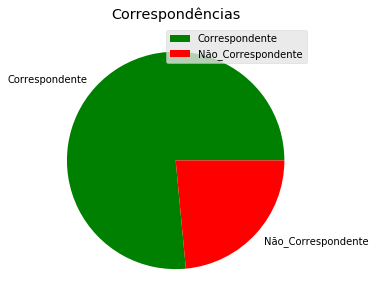

In [1097]:
dataframe.plot.pie(y='Correspondencia_Correta', figsize=(5,5), colors=['green','red'])
plt.title('Correspondências')
plt.ylabel('');

___
### Concluindo:

**Por fim, a comparação entre os dados do comparador e da nossa classificação obteve esses resultados:**

- Irrelevante Correspondente: 71.0%

- Irrelevante Não Correspondente: 15.5%

- Relevante Correspondente: 8.0%

- Relevante Não Correspondente: 5.5% 

**A partir desses dados pode-se concluir que o classificador não foi muito efetivo ao classificar os itens relevantes, de forma que as porcentagens correspondentes relevantes são cerca de 8%. Isso pode ter ocorrido por conta da diferença do número de frases consideradas irrelevantes e relevantes, tendo muito mais frases irrelevantes. Essa disparidade, afeta o cálculo das probabilidades de cada palavra, isso pode ser comprovado por conta dos dados gerados na comparação entre o nossa classificação e o classificador, pois o classificador acertou cerca de 71% dos tweets considerados irrelevantes para a empresa.**

**Além disso, algumas melhorias poderiam ser utilizadas para que a comparação das classificações dos tweets fosse mais efetiva, dentre elas estão:**

- Selecionar algumas palavras que sejam consideradas relevantes para o produto ou empresa;

- Considerar mais classificações dos tweets, por exemplo, **Crítica, Elogio, Pergunta/Dúvida, Melhoria, e Sugestão**;

- Propor uma forma mais efetiva de limpeza, por exemplo, erros de ortografia não são considerados e por isso uma palavra pode aparecer várias vezes pelo fato de ter sido escrita de maneiras diferentes ou incorretas.

**O Naive-Bayes tem uma aplicação abrangente, uma vez que ele consegue calcular as probabilidades e concluir suas classificações de um modo preciso utilizando uma quantidade de dados pequena. Desse modo, ele é utilizado para várias classificações como, diagnóticos médicos, venda de produtos baseado no seu sexo ou idade e outros.**

___
# Bibliografia:

[Naive Bayes and Text Classification](https://arxiv.org/pdf/1410.5329.pdf)

**Suavização de Laplace**:
[A practical explanation of a Naive Bayes Classifier](https://monkeylearn.com/blog/practical-explanation-naive-bayes-classifier/) 

[https://www.organicadigital.com/blog/algoritmo-de-classificacao-naive-bayes/] 